# Advanced example exercises

## Topics:
1. Julia sets
2. Solving differential equations
3. The Game of Life

In [ ]:
import Pkg;
Pkg.add("Plots"); Pkg.add("BenchmarkTools"); Pkg.add("DifferentialEquations")

## 1. Julia set

Now you can bring together everything you have learned to calculate the so-called [Julia sets](https://en.wikipedia.org/wiki/Julia_set) of a certain function. The Julia set of a holomorph (or meromorph) complex function $f(z)$ is the subset of the complex plane consisting of the points $z$ for which the iterative application of the function $z,f(z),f(f(z)),...$ is instable. Here we give the scheme for the calculation of the julia set for $f(z)=z^2+c$.<br>
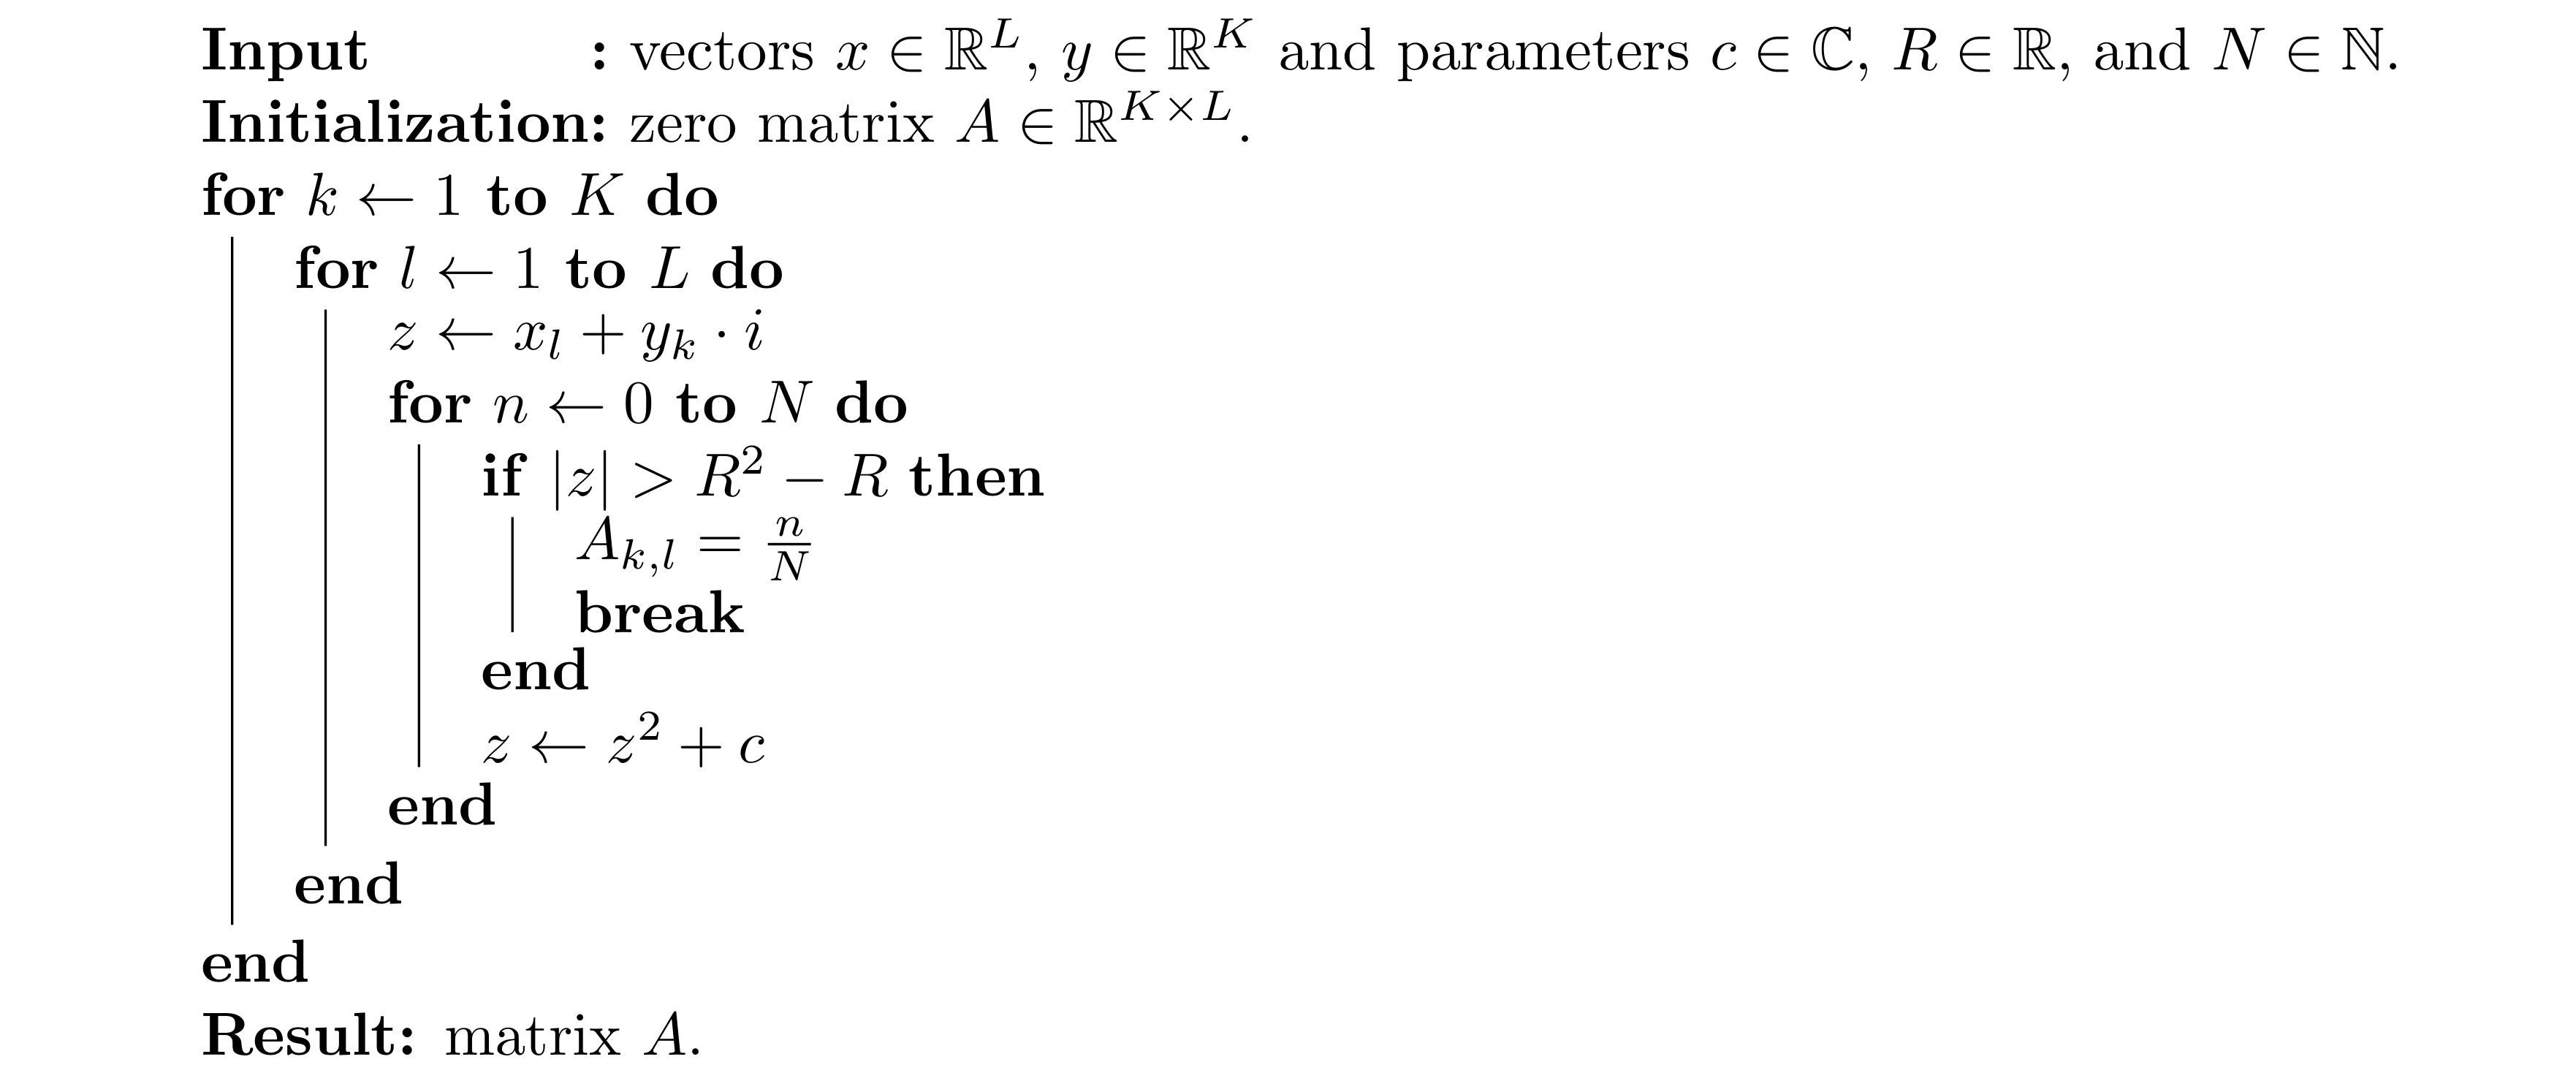<br>
It is up to you to implement this in Julia code. Create the function `juliaset()` that gives the wanted matrix and visualize your result using the `heatmap()` function. Test your function for $c=0.4+i0.6$, $R=2$ and $N=1000$. For the grid of the complex plane take 1500 points on the real axis between $-1.5$ and $1.5$ and 1000 points along the imaginary axis between $-1$ and $1$.

In [ ]:
# First set the values of the parameters
c=
R=
N=
const K=1500; const L=1000

x=Array(range(-1.5,1.5,K))
y=Array(range(-1.0,1.0,L))

# Define the complex function that is used iteratively, make it type-specific
function f(z,c)
    
end

In [ ]:
# Complete the function, make it type-specific
function juliaset(x,y,R,N,c)
    # some code
    return A
end

In [ ]:
#Plot your result
using Plots, BenchmarkTools
Aⱼ=juliaset(x,y,R,N,c);
heatmap(Aⱼ; c = :viridis, clims=(0, 0.15), cbar = :none, axis = :none, ticks = :none,)

<br>
Add a method to the function julia set that takes a complex number as input instead of the `x` and `y` vectors and that returns the corresponding element of the matrix `A`. Broadcast this function to your 2D complex plane to get the same result as above.

In [ ]:
function juliaset(z::ComplexF64,R,N,c)
    # some code
end
Z=x' .+ im*y
# plot your result again

## 2. Solving differential equations

[*DifferentialEquations.jl*](https://docs.sciml.ai/DiffEqDocs/stable/basics/overview/) is an extensive and well-maintained package for solving all types of differential equations. It's intuitive to work with and offers a very wide variety of solvers that can be called.
### Example
As an example we will treat the simple pendulum of length $L$:
\begin{align}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta)=0.
\end{align}
Using the velocity $v=L\frac{d\theta}{dt}$ we transform to a system of first order differential equations:
\begin{align}
\begin{cases}
\frac{d\theta}{dt} = \frac{v}{L}\\
\frac{dv}{dt} = -g\sin(\theta)
\end{cases}
\end{align}
Let's solve this numerically and make a nice plot of the solution as well. We start with including the right packages and setting the constants.

In [ ]:
using DifferentialEquations, Plots
# Constants
const g = 9.81
L=1.0

Next, we define our problem and the initial conditions.

In [ ]:
# Define problem
function pendulum(u,p,t)
    θ=u[1]
    v=u[2]
    Δθ=v/L
    Δv=-g*sin(θ)
    return [Δθ,Δv]
end

# Initial conditions
u₀=[0, π/2]
tspan=(0.0,5.0)

The function we defined here takes as input the two variables at some time $t$, that are grouped togehter in a small vector $u$ and returns simply the change in these variables over a timestep $\Delta t$ according to our equations (also in the form of a vector).

One of the strengths of the *DifferentialEquations.jl* package is that many types can be used for the state of your system. This means $u$ does not have to be a vector, but can be a simple (complex) Float64, Matrix{ComplexF64}, Array{Float64,3}, Vector{Matrix{Float64}} and so on.

Now let us pass everything on to the solver and plot our results.

In [ ]:
# Pass to solver
prob=ODEProblem(pendulum,u₀,tspan)
sol=solve(prob,RK4())

# Plot results
plot(sol,linewidth=2,title="Simple Pendulum Problem", xaxis="Time",yaxis="Height",label=["\\theta" "v"])

We take a second to look at the structure of the $sol$ object. Run the following commands: 

In [ ]:
typeof(sol)

How many timepoints got saved? And what are the times at which our solution was saved?

In [ ]:
size(sol)

In [ ]:
sol.t

In [ ]:
println("The position at time t="*string(sol.t[30])*" is θ="*string(sol[1,30]))

### Exercise
Now your turn! We regard the following Lorenz system:
\begin{align}
\begin{cases}
\frac{dx}{dt}=\sigma(y-x)\\
\frac{dy}{dt}=x(\rho-z)-y\\
\frac{dz}{dt}=xy-\beta z
\end{cases}
\end{align}

Implement the problem like we did before and solve for the initial conditions $[x,y,z]=[1,0,0]$ and the parameters $\sigma=10$, $\rho=28$ and $\beta=8/3$. Try making a plot that puts the solution for $z$ to the solution of $y$ up until time $t=100$.

In [ ]:
# Implement here

The way of working in Julia is to first write general "high-level" code and then optimize it step-by-step. Let's check the performace by including the *BenchmarkTools.jl* library and simply add the `@benchmark` macro in front of the solve line.

The `@benchmark` macro executes the command following it multiple times to get an accurate measurement. Because of the JIT compilation the first run will be a lot slower, but once compiled code is generated the problem will run much faster. 

Let's try and get some better performance. Focus only on the final outcome (and not the timesteps in between) by adding the argument `save_everystep=false`.

We have quite some memory allocated, even when we don't save all the timesteps. This is of course caused by our `lorenz(u,p,t)` function, that creates an array for the output everytime it is called. It is the main source of memory usage. To fix this, we make de lorenz function **non-allocating**. Rewrite our problem as a function `lorenz!(du,u,p,t)` that simply changes the values of `du` instead of creating a new output. (The exclamation mark is a notational guideline.)

In [ ]:
# Define problem
function lorenz!(du,u,p,t)
    #some code
    return nothing
end

Take a quick look at the webpage of the [*StaticArrays.jl*](https://github.com/JuliaArrays/StaticArrays.jl) package. Change the initial state and the output of the function `lorenz(u,p,t)` to static arrays and benchmark your solver again? Do you see any change?


The solver now automatically uses static arrays internally, simply because it is the type of the initial condition that we provided.

## 3. The Game of Life

Back in 1970, mathematician John Horton Conway came up with the **Game of Life**, also known simply as **Life**. The game is set in an infinite two-dimensional grid of square cells, where each cell interacts with its eight neighbouring cells (vertical, horizontal and diagonal adjacent cells). Each cell can be either *dead* or *alive*, but its state can change in time. Each timestep, the following transitions occur:
1. A living cell with fewer than two living neighbours unfortunately dies (underpopulation).
2. Any living cell with two or three living neighbours lives on to the next generation.
3. Any live cell with four or more living neighbours dies (overpopulation).
4. Any dead cell with **exactly** three living neighbours is revived (reproduction).

The Game of Life is a zero-player game, meaning it's evolution is determined solely by the initial configuration that pass along. Now write the code that determines $n$ timesteps for a finite grid of size $N\times M$, given an initial condition $g_0$.

Represent the state of the grid as a matrix of ones (alive) and zeros (dead). Create a [random](https://docs.julialang.org/en/v1/stdlib/Random/#Base.rand) initial state `grd` for $N=M=50$.

In [ ]:
# Create initial state
N = 50; M=50
grd = #some code

Write a function that, for a given grid, counts the number of living neighbours of the cell with indices $x$ and $y$.

In [ ]:
# Count number of live neighoubrs
function count_neighbours(grid,x,y)
    ncounts=0; Nx=size(grid,1); Ny=size(grid,2) 
    # some code
    return ncounts
end

Now we can continue with the timestepping. Create a function that takes a grid as input and outputs the next step in time for this grid, based on the rules listed above.

In [ ]:
function timestep(grid)
    new_grid=copy(grid)
    #some code
    return new_grid
end

Now you're ready to run the game. Use the code below to create an animation.

In [ ]:
using Plots
gr()

# Animate the plot for 50 generations
anim = @animate for i in 1:50
    grid.= timestep(grid)
    heatmap(grid,c=:Greys,legend=:none,xaxis=false,yaxis=false,ticks=false)
end
gif(anim,fps=3)

Can you recognise any [patterns](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life#Examples_of_patterns)? Go back to the inital state and try a larger grid, more timesteps or spead up the animation.